In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
#X_test = pd.read_csv("test.csv")

df.prcp = df.prcp.fillna(0) # eeldan, et vihmasaju andme puudumine on sama mis 0
df.snow = df.snow.fillna(0) # eeldan, et lumesaju andme puudumine on sama mis 0

df = df.dropna()
#2021-09-01 00:00:00+03:00
df.time = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S%z')
df['Month'] = df['time'].apply(lambda time: time.month)
df['Day'] = df['time'].apply(lambda time: time.day)
df['Hour'] = df['time'].apply(lambda time: time.hour)
df["workday"] = df["time"].apply(lambda time: time.weekday() < 5)
df = df.drop("time", axis = 1)

df["is_dew"] = np.where(df["dwpt"] > df["temp"], True, False) # kas on udu või mitte

df_orig = df.copy(deep = True)

X = df.drop("consumption", axis = 1)
Y = df.consumption
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.2, random_state = 69)
for i in X_train:
    print(i)
dropped = []
results = []

temp
dwpt
rhum
prcp
snow
wdir
wspd
wpgt
pres
coco
el_price
Month
Day
Hour
workday
is_dew


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

lasso = Lasso()
lasso.fit(X_train, y_train)
predict = lasso.predict(X_test)
print("Lasso:", mean_absolute_error(y_test, predict))

ridge = Ridge().fit(X_train, y_train)
predict = ridge.predict(X_test)
print("Ridge:", mean_absolute_error(y_test, predict))

linear = LinearRegression().fit(X_train, y_train)
predict = linear.predict(X_test)
print("Linear:", mean_absolute_error(y_test, predict))

params = {'alpha': (np.linspace(0.001,300,1000))}

Lasso: 0.6362023420048444
Ridge: 0.6198787960585538
Linear: 0.6199138511316742


lasso = Lasso(max_iter = 7000) # best case is equal to linear
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)
print(mean_absolute_error(y_test, lasso_model.predict(X_test)))

ridge = Ridge() # best case is equal to linear
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)
print(mean_absolute_error(y_test, ridge_model.predict(X_test)))

In [3]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=70).fit(X_train, y_train)
print(mean_absolute_error(y_test, neigh.predict(X_test)))

0.6084550838083893


min = 99
k = 0
for i in np.arange(1,200, 2):
    neigh = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    error = mean_absolute_error(y_test, neigh.predict(X_test))
    if (error < min):
        min = error
        k = i
print(k)
neigh = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
error = mean_absolute_error(y_test, neigh.predict(X_test))
print(error)

neigh = KNeighborsRegressor(n_neighbors=k, weights = "uniform").fit(X_train, y_train)
error = mean_absolute_error(y_test, neigh.predict(X_test))
print(error)
neigh = KNeighborsRegressor(n_neighbors=k, weights = "distance").fit(X_train, y_train)
error = mean_absolute_error(y_test, neigh.predict(X_test))
print(error)

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state=69)
rf.fit(X_train, y_train)
print(mean_absolute_error(y_test, rf.predict(X_test)))

0.4984734306134604


In [5]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
rf = RandomForestRegressor(n_estimators = 100, random_state=69)
rf.fit(X_train_scale, y_train)
print(mean_absolute_error(y_test, rf.predict(X_test_scale)))

0.5002449851101847


In [6]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', "log2", 1]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [7]:
def calc(X, Y):
    X_train_a, X_test_a, y_train_a, y_test_a =train_test_split(X, Y, test_size=0.2, random_state = 69)
    rf = RandomForestRegressor(n_estimators = 1200,random_state = 69, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', max_depth = 90, bootstrap = False)
    rf.fit(X_train_a, y_train_a)
    print(mean_absolute_error(y_test_a, rf.predict(X_test_a)))
    results.append((mean_absolute_error(y_test_a, rf.predict(X_test_a))).round(4))
    return rf.predict(X_test_a).round(4)
calc(X, Y)
dropped.append("None")

0.4769505782211634


In [8]:
df = df_orig.copy(deep = True)
df = df.drop("wdir", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("Wind direction")

0.4742051861226922


In [9]:
df = df_orig.copy(deep = True)
df = df.drop("wspd", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("Windspeed")

0.4769997955132023


In [10]:
df = df_orig.copy(deep = True)
df = df.drop("coco", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("Coco")

0.4730630618423665


In [11]:
df = df_orig.copy(deep = True)
df = df.drop("prcp", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("prcp")

0.47593439348818745


In [12]:
df = df_orig.copy(deep = True)
df = df.drop("dwpt", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("dwpt")

0.4791223605320627


In [13]:
df = df_orig.copy(deep = True)
df = df.drop("wpgt", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("Peak Windspeed")

0.4772299255509233


In [14]:
df = df_orig.copy(deep = True)
df = df.drop("dwpt", axis = 1)
df = df.drop("prcp", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("dwpt + prcp")

0.47945604923565616


In [15]:
df = df_orig.copy(deep = True)
df = df.drop("wspd", axis = 1)
df = df.drop("dwpt", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("wspd + dwpt")

0.4787417445900338


In [16]:
df = df_orig.copy(deep = True)
df = df.drop("wdir", axis = 1)
df = df.drop("prcp", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("wdir + prcp")

0.4742466061147509


In [17]:
df = df_orig.copy(deep = True)
df = df.drop("wdir", axis = 1)
df = df.drop("prcp", axis = 1)
df = df.drop("dwpt", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
calc(X, Y)
dropped.append("wdir + prcp + dwpt")

0.47712472652372445


In [18]:
for i in range(sum( 1 for i in results)):
    print(results[i], dropped[i])

0.477 None
0.4742 Wind direction
0.477 Windspeed
0.4731 Coco
0.4759 prcp
0.4791 dwpt
0.4772 Peak Windspeed
0.4795 dwpt + prcp
0.4787 wspd + dwpt
0.4742 wdir + prcp
0.4771 wdir + prcp + dwpt


df = df_orig.copy(deep = True)

X = df.drop("consumption", axis = 1)
Y = df.consumption
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.2, random_state = 69)
rf = RandomForestRegressor(random_state = 69)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 300, cv = 5, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_) # {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 90, 'bootstrap': False}
print(mean_absolute_error(y_test, rf_random.predict(X_test)))

0.4730630618423665


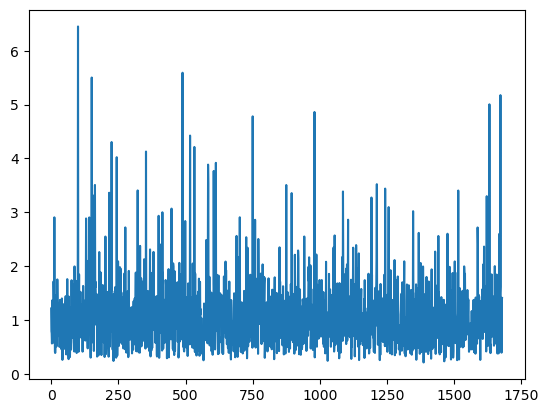

In [19]:
import matplotlib.pyplot as plt
df = df_orig.copy(deep = True)
df = df.drop("coco", axis = 1)

X = df.drop("consumption", axis = 1)
Y = df.consumption
results = calc(X, Y)

plt.plot(results, label = "Results")
plt.show()

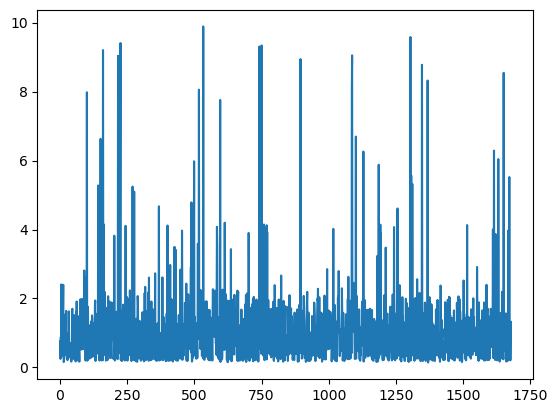

In [20]:
y_test = y_test.reset_index(drop = True)
plt.plot(y_test, label = "True")
plt.show()

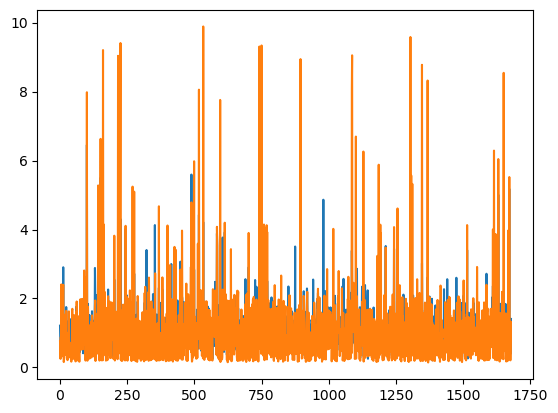

0       0.4481
1       0.5033
2       0.4997
3      -0.3229
4       0.2169
         ...  
1674   -0.2882
1675    0.0651
1676    0.1833
1677    0.5117
1678    0.0870
Name: consumption, Length: 1679, dtype: float64

In [22]:
plt.plot(results, label = "Results")
plt.plot(y_test, label = "True")
plt.show()

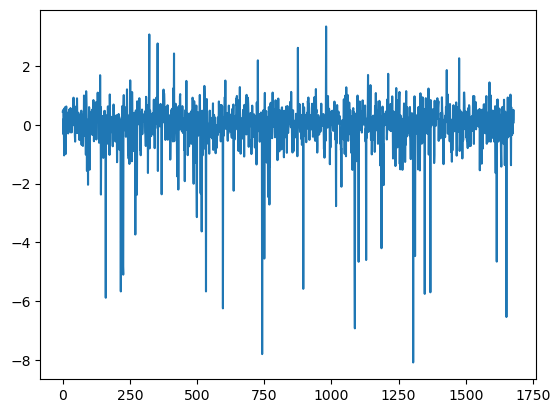

In [23]:
plt.plot(results - y_test, label = "Error")
plt.show()